# **Spotify Songs Exploratory Data Analysis Project**

#### __Project Overview:__
This project focuses on performing an in-depth **Exploratory Data Analysis (EDA)** of the **Spotify Songs Dataset** downloaded from Kaggle. The goal is to analyze various audio features of songs to understand the objectives mentioned below which is based on the downloaded datatset. 

#### __OBJECTIVE__

-Top 5 most popular artists                                                                                                    
-Top 5 loudest tracks                                                                                                          
-To 10 instrumentalness tracks                                                                                                  
-Top 10 energetic tracks                                                                                                         
-Top 10 tracks with the most valence                                                                                            
-Most common durations                                                                                                          
-Most popular artist                                                                                                            
-Artist with the most danceability song                                                                                         
-Multiple feature plots                                                                                                         

(To understand the above terms refers to the Spotify Audio Features doc)

[Link for Spotify Audio Features Docs] (https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

[Link for Spotify Songs Dataset Download] (https://www.kaggle.com/datasets/geomack/spotifyclassification)

# **Loading Libraries and Dataset**

In [1]:
#Loading all the necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\salon\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#To set the style for Seaborn plots
sns.set_style("darkgrid")

In [2]:
#Loading the Spotify Songs dataset
df=pd.read_csv("C:/Users/salon/Desktop/projects/Python/spotify_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True) #axis=1 because it is a column and inplace is True because removing it permanentaly
df.head() #for the first five rows

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# **DATA CLEANING**

In [5]:
df.isna().sum() 
#Returns the added True(missing values) values for each column, effectively counting the number of missing values in each column.

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [6]:
df.info() #Returns the summary of the Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [7]:
df.shape #Returns the total number of rows and columns

(2017, 16)

In [8]:
df.columns #Returns the names of columns
len(df.columns) #len function is used to get the length

16

In [9]:
df.describe() #Rreturns the summary of statistics for the numerical columns

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# **Data Analysis**

In [10]:
#Top 5 Most Popular Artists
top_five_artists=df.groupby("artist").count().sort_values(by='song_title',ascending=False)["song_title"][:5]
print("Top 5 Artists are:\n")
top_five_artists

#This groups the dataframe by the "artist" column and counts the no. of songs for each artist. 
#It then sorts the counts in descending order based on the "song_title" column and selects the top five artists.)

Top 5 Artists are:



artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

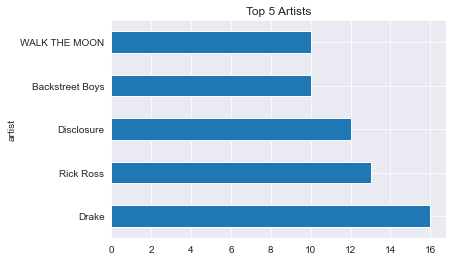

In [11]:
top_five_artists.plot.barh()
plt.title("Top 5 Artists")
plt.show()

This chart highlights Drake as the dominant artist in terms of song count within this selection. The others are also prominent but with fewer contributions.

In [12]:
#Top 5 Loudest Tracks
top_five_loudest_tracks=df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
print("Top 5 Loudest Tracks are:\n")
top_five_loudest_tracks

#This selects the 'loudness' and 'song_title' columns, sorts the DataFrame by 'loudness' in ascending order, and takes the top five rows.
#"loudest" would be represented by the most negative values

Top 5 Loudest Tracks are:



,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


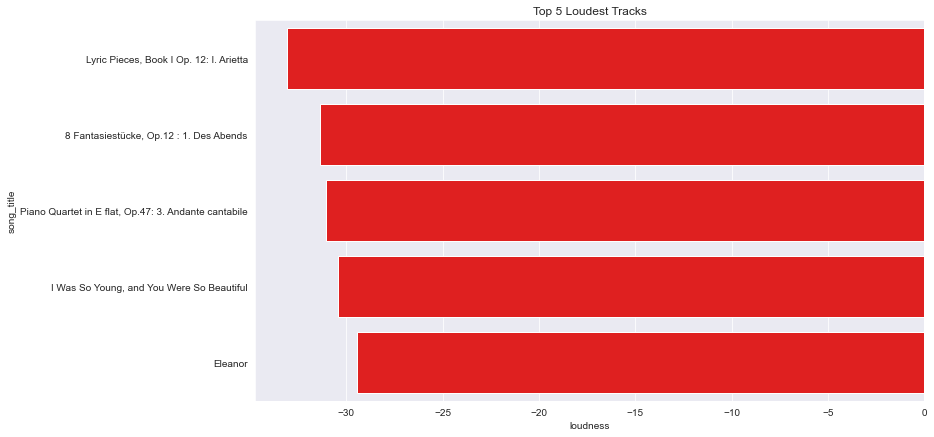

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness",y="song_title",data=top_five_loudest_tracks,color="red")
plt.title("Top 5 Loudest Tracks")
plt.show()

This chart highlights the Top 5 Loudest Tracks, where "Lyric Pieces, Book I Op. 12: I. Arietta" is the Loudest song followed by "8 Fantasiestücke, Op.12 : 1. Des Abends","Piano Quartet in E flat, Op.47: 3. Andante cantabile","I Was So Young, and You Were So Beautiful" and "Eleanor" respectively.

In [14]:
#Top 10 Instrumentalness Tracks
top_ten_instrumental_tracks=df[["instrumentalness","song_title"]].sort_values(by="instrumentalness",ascending=False)[:10]
print("Top 10 Instrumentalness Tracks are:\n")
top_ten_instrumental_tracks

#This selects the 'instrumentalness', 'song_title', and 'artist' columns, sorts the df by 'instrumentalness' in descending order, and takes the top ten rows.

Top 10 Instrumentalness Tracks are:



,instrumentalness,song_title
1313,0.976,Senseless Order
271,0.968,So Destroyed (channeling Rage Peace)
1575,0.964,A Hundred Dreams from Now
1619,0.958,Raven
725,0.957,Strandbar (disko)
1546,0.956,Almas vaggvisa
1322,0.955,Pitchblack
1349,0.954,Prismatic Abyss
1661,0.954,Yebisah
121,0.952,Chasing Heaven


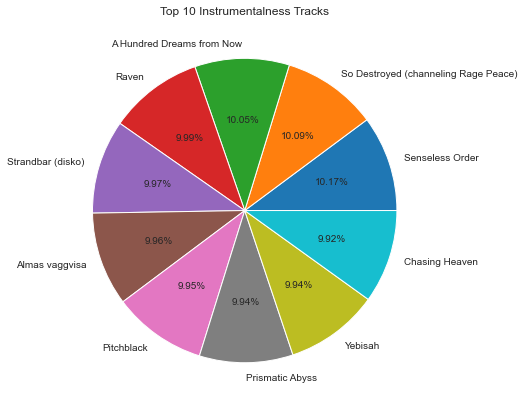

In [15]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness",data=top_ten_instrumental_tracks,autopct="%1.2f%%",labels=top_ten_instrumental_tracks.song_title)
plt.title("Top 10 Instrumentalness Tracks")
plt.show()

#autopct is used to show percentange of each slice

This Pie Chart highlights the Top 10 Instrumentalness Tracks, where "Senseless Order" is one of the Instrumental Track followed by "So Destroyed","A Hundered Dreams" and others.

In [16]:
#Top 10 Energetic Tracks
top_ten_energetic_tracks=df[["energy","song_title"]].sort_values(by="energy",ascending=False)[:10]
print("Top 10 Energetic Tracks are:\n")
top_ten_energetic_tracks

#This selects the 'energy' and 'song_title' columns, sorts the df by 'energy' in descending order, and takes the top ten rows.

Top 10 Energetic Tracks are:



,energy,song_title
1299,0.998,No Absolution
1322,0.997,Pitchblack
1297,0.994,A Darkened Gospel
1347,0.993,Unanswered
2015,0.992,First Contact
1680,0.992,Paranoia
1332,0.992,Beautiful Agony
1328,0.991,Down into the Abyss
1681,0.990,Hated
1296,0.990,Black Colors


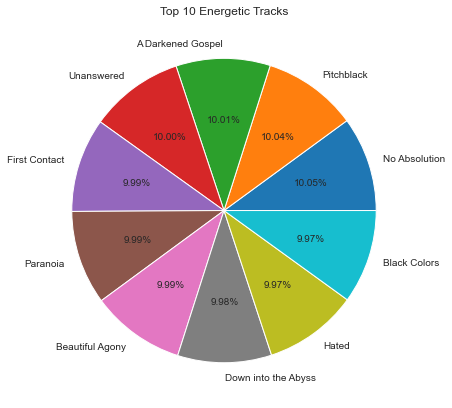

In [17]:
plt.figure(figsize=(12,7))
plt.pie(x="energy",data=top_ten_energetic_tracks,autopct="%1.2f%%",labels=top_ten_energetic_tracks.song_title)
plt.title("Top 10 Energetic Tracks")
plt.show()

This Pie Chart highlights the Top 10 Energetic Tracks, where "No Absolution" is one of the Energetic Track followed by others.

In [18]:
#Top 10 tracks with the most valence
top_ten_tracks_with_valence=df[["valence","song_title"]].sort_values(by="valence",ascending=False)[:10]
print("Top 10 Tracks with most valence are:\n")
top_ten_tracks_with_valence

#This selects the 'valence' and 'song_title' columns, sorts the df by 'valence' in descending order, and takes the top ten rows.

Top 10 Tracks with most valence are:



,valence,song_title
460,0.992,Abataka - Original Mix
912,0.975,I'm Walkin' - 2002 Digital Remaster
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)"
207,0.973,Look at You
48,0.973,Azon de ma gnin kpevi
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...
1590,0.972,Jelly On A Plate
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...
497,0.968,Mi Swing es Tropical
112,0.967,Please Mr. Postman


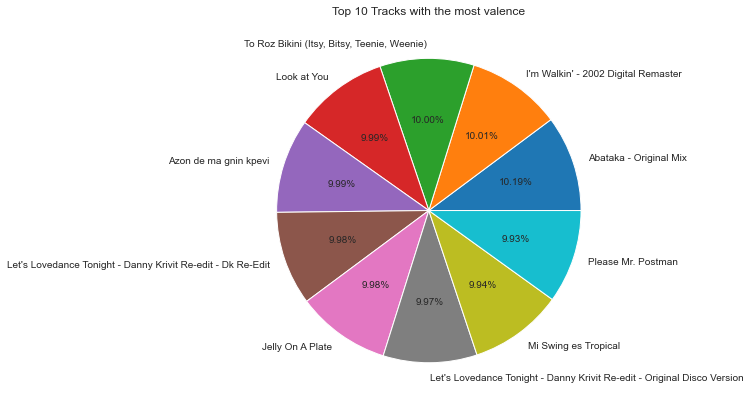

In [19]:
plt.figure(figsize=(12,7))
plt.pie(x="valence",data=top_ten_tracks_with_valence,autopct="%1.2f%%",labels=top_ten_tracks_with_valence.song_title)
plt.title("Top 10 Tracks with the most valence")
plt.show()

This Pie Chart highlights the Top 10 Tracks with the most Valeance, where "Abataka-Original Mix" has the most Valeance followed by others.

In [20]:
#Most Common Duration
most_common_duration=df[['duration_ms']].mode().values[0]
most_common_duration_count=df[['duration_ms']].value_counts().max()
print("The most common duration is",most_common_duration," milliseconds with the occurrences of",most_common_duration_count)

The most common duration is [192000]  milliseconds with the occurrences of 5


In [21]:
#Most Popular Artist
most_popular_artist=df['artist'].value_counts().idxmax()
most_popular_artist
most_popular_artist_count=df['artist'].value_counts().max()
most_popular_artist_count
print("The most popular artist is",most_popular_artist,"with",most_popular_artist_count,"occurrences.")

The most popular artist is Drake with 16 occurrences.


In [22]:
#Artist with the most danceability song
artist_with_danceable_songs=df[['danceability',"song_title","artist"]].sort_values(by="danceability",ascending=False)[:1]
print("Artist's name with the song title and it's danceability:\n")
artist_with_danceable_songs

#This selects the 'danceability', 'song_title', and 'artist' columns, sorts the df by 'danceability' in descending order, and takes the top five rows.

Artist's name with the song title and it's danceability:



,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember


# **Multiple Feature Plot**

In [3]:
interest_feature_cols=['danceability', 'energy','instrumentalness', 'loudness', 'tempo', 'valence']

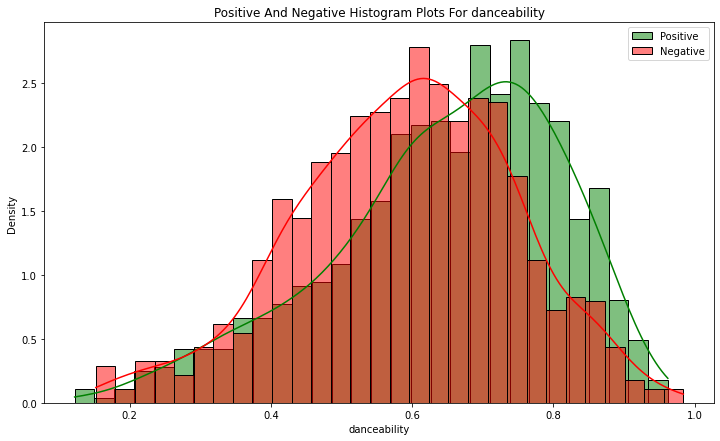

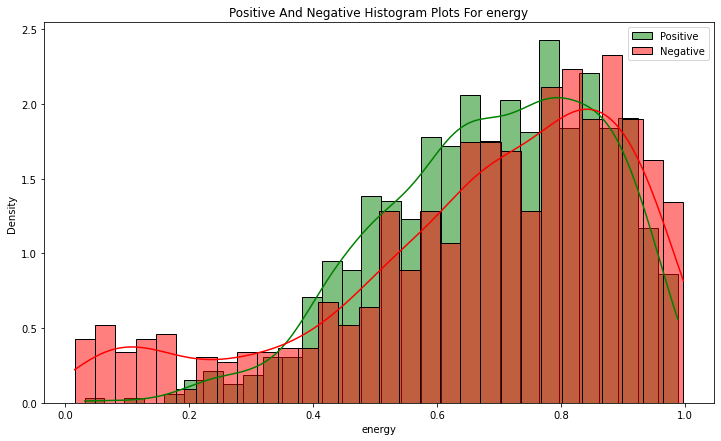

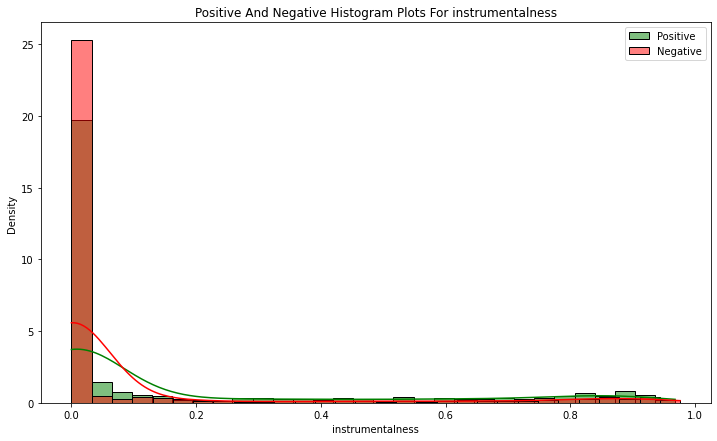

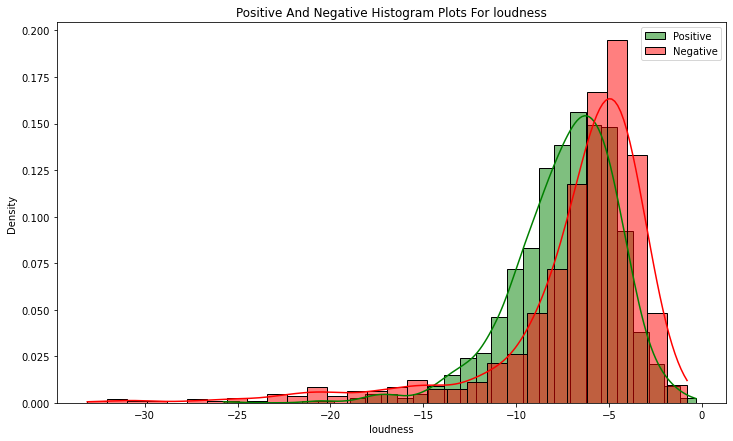

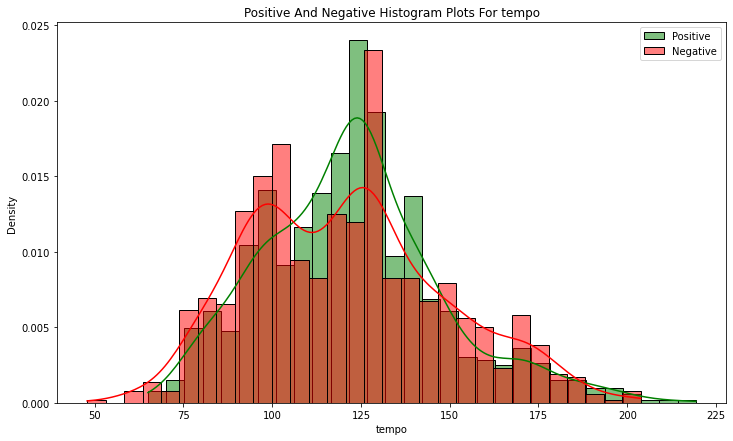

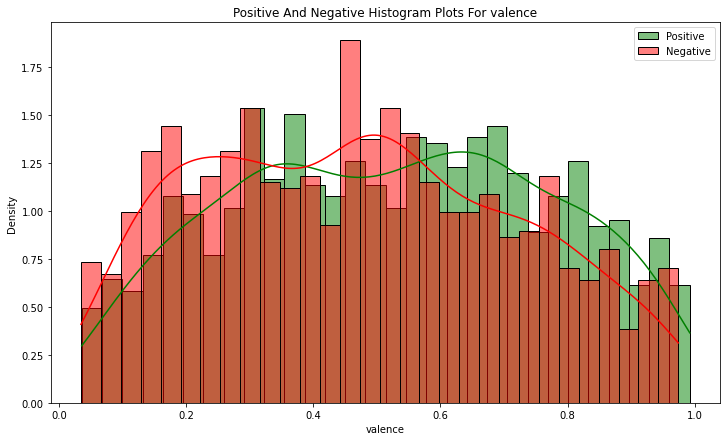

In [4]:
for feature_col in interest_feature_cols:
  pos_data=df[df["target"]==1][feature_col]
  #This line filters the DataFrame to include only rows where the target column equals 1 (indicating the positive class/Liked). 
  #It then selects the data from the column specified by feature_col and stores it in pos_data.
  
  neg_data=df[df["target"]==0][feature_col]
  #This line filters the DataFrame df to include only rows where the target column equals 0 (indicating the negative class/disliked).
  #It then selects the data from the column specified by feature_col and stores it in neg_data.

  plt.figure(figsize=(12,7))

  sns.histplot(pos_data,bins=30,label="Positive",color="green",kde=True,stat="density",common_norm=False)
  sns.histplot(neg_data,bins=30,label="Negative",color="red",kde=True,stat="density",common_norm=False)
  #kde=True adds a Kernel Density Estimate (KDE) curve to the histogram, showing the smoothed distribution of the data.
  #stat="density" scales the histogram to display the density rather than the count.
  #common_norm=False ensures that the histograms for positive and negative data are not normalized together, allowing them to be scaled independently.
 
  plt.legend(loc="upper right")
  plt.title(f"Positive And Negative Histogram Plots For {feature_col}")
  plt.show()

### Positive and Negative Histogram PLots
__danceability__
From this histogram we can conclude that, people like(Positive) songs when the danceability is more than __0.7__ where as people tends to dislike(Negative) songs when it's danceability is less.

__energy__
From this histogram we can conclude that, people like(Positive)songs when the energy is between __0.4 to 0.8__ where as people tends to dislike(Negative) songs when it is less than 0.4 and more than 0.8.

__instrumentalness__
From this histogram we can conclude that, people like(Positive)songs when the instrumentalness is around __0.1 and more__ where as people tends to dislike(Negative) songs when it is around 0.

__Loudness__
From this histogram we can conclude that, people like(Positive) songs when the loudness is between __-15 to -7__ where as people tends to dislike(Negative) songs when it is too loud or too quiet.

__Tempo__
From this histogram we can conclude that, people like(Positive)songs when the Tempo around __125 - 130__ where as people tends to dislike(Negative)songs when the Tempo is to fast or to slow.